Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

In [88]:
# user_data.dtypes
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [89]:
# user_data.isna().sum()
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [90]:
round(user_data.describe(), 2)

,client,age
count,2954.00,2954.00
mean,50767.89,44.20
std,28800.51,14.25
min,40.00,20.00
25%,25639.50,32.00
50%,51569.50,44.00
75%,75963.25,56.00
max,99973.00,69.00


Какой клиент совершил больше всего успешных операций? (success == True)

In [91]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [92]:
logs[['client', 'success']][logs.success == True].value_counts().head(9)
#logs[['client', 'success']][logs.success == True].groupby('client').agg({'success': 'sum'}).sort_values('success', ascending = False)

client  success
12179   True       41
61468   True       41
52870   True       41
61473   True       41
92584   True       41
82563   True       41
78349   True       41
36165   True       41
28719   True       41
Name: count, dtype: int64

С какой платформы осуществляется наибольшее количество успешных операций?

In [93]:
logs[['platform', 'success']][logs.success == True].value_counts()

platform  success
phone     True       2019
computer  True       1090
tablet    True        180
Name: count, dtype: int64

Какую платформу предпочитают премиумные клиенты?

In [94]:
df = logs.merge(user_data, on='client')
df[df.premium == True].platform.value_counts()

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

C:\Users\Кирилл\AppData\Local\Temp\ipykernel_11744\715573046.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.query('premium == True').age, ax=ax[0])


OptionError: No such keys(s): 'mode.use_inf_as_null'

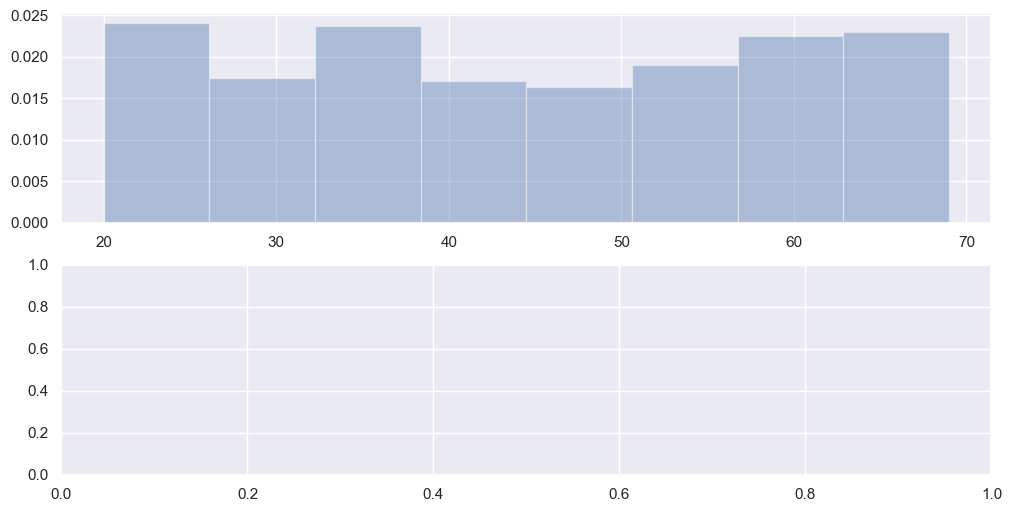

In [ ]:
df.query('premium == True').age.plot()
df.query('premium == False').age.plot()

<AxesSubplot:xlabel='age', ylabel='premium'>

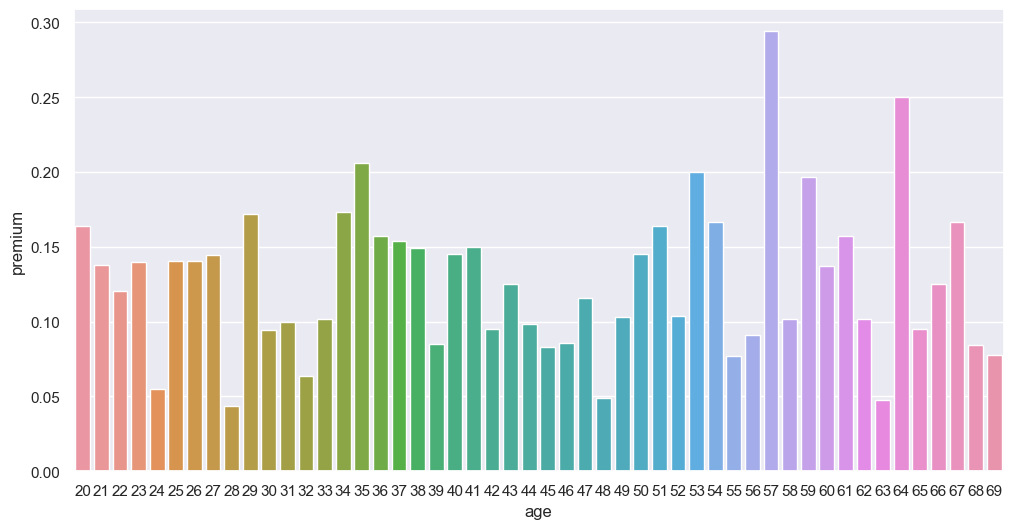

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})  # Глобальная настройка размера
sns.barplot(x=df.age, y=df.premium, errorbar=None)

Постройте график распределения числа успешных операций


In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})  # Глобальная настройка размера
sns.distplot(x=df.time, y=df.success, errorbar=None)

TypeError: distplot() got an unexpected keyword argument 'y'


Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?